##Модель
Экспоненциального роста:
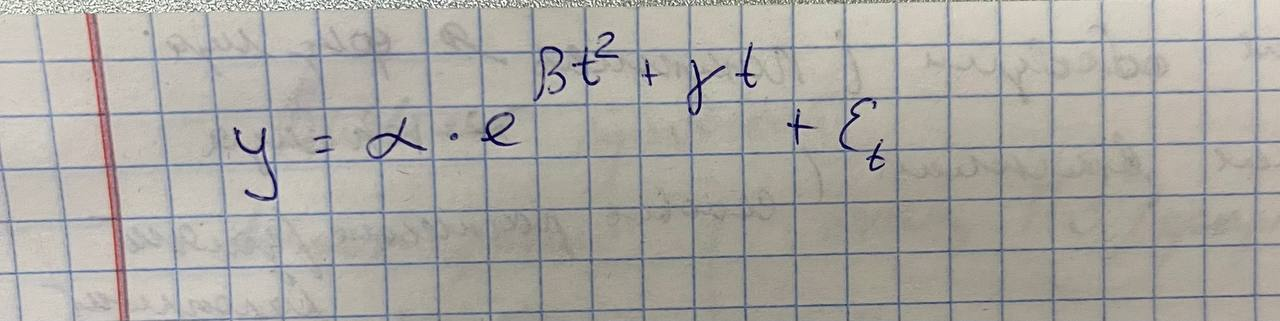

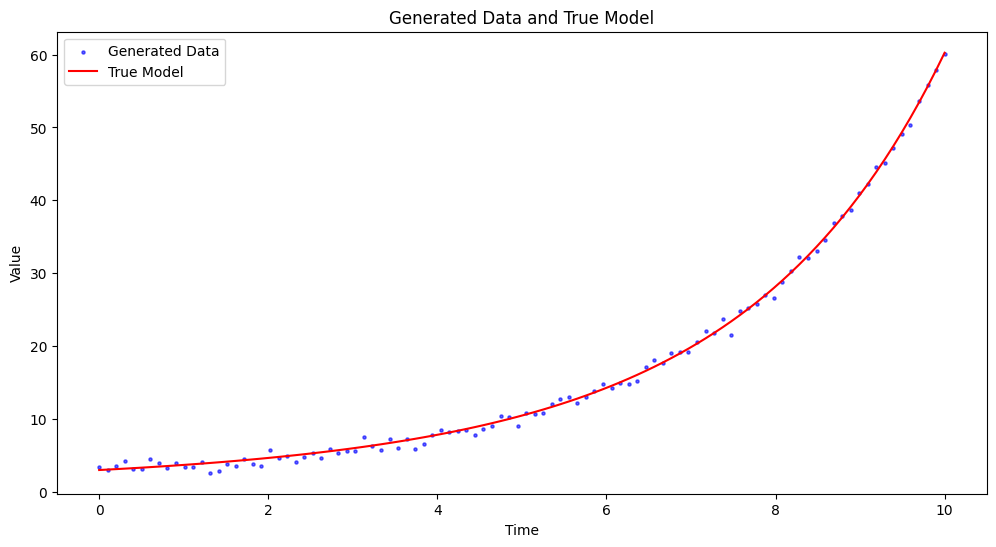

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, invgamma

# Генерируем синтетические данные
np.random.seed(42)
t = np.linspace(0, 10, 100)
true_alpha = 3.0
true_beta = 0.01
true_gamma = 0.2
true_sigma = 0.7
y = true_alpha * np.exp(true_beta * t**2 + true_gamma * t) + np.random.normal(0, true_sigma, 100)

#Визуализация
plt.figure(figsize=(12, 6))
plt.scatter(t, y, s=5, color="blue", alpha=0.6, label="Generated Data")
plt.plot(t, true_alpha * np.exp(true_beta * t**2 + true_gamma * t), color="red", label="True Model")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Generated Data and True Model")
plt.legend()
plt.show()

In [ ]:
def log_posterior(alpha, beta, gamma, sigma):
    if sigma <= 0:
        return -np.inf

    residuals = y - alpha * np.exp(beta * t**2 + gamma * t)

    log_likelihood = -0.5 * len(y) * np.log(2 * np.pi * sigma**2) - 0.5 * np.sum(residuals**2) / sigma**2

    log_p_alpha = 0
    log_p_beta = -0.5 * beta**2
    log_p_gamma = -0.5 * gamma**2
    log_p_sigma = -2 * np.log(sigma) - 1 / sigma


    return log_likelihood + log_p_alpha + log_p_beta + log_p_gamma + log_p_sigma


def proposal(theta, step_sizes):
    return theta + np.random.normal(0, step_sizes, size=len(theta))



In [ ]:
def metropolis_hastings(log_posterior, initial_params, step_sizes, n_samples, burn_in):
    samples = []
    current_params = np.array(initial_params)
    current_log_posterior = log_posterior(*current_params)
    accept_count = 0

    for i in range(n_samples + burn_in):
        proposed_params = proposal(current_params, step_sizes)
        proposed_log_posterior = log_posterior(*proposed_params)


        acceptance_prob = np.exp(min(0, proposed_log_posterior - current_log_posterior))
        if np.random.rand() < acceptance_prob:
            current_params = proposed_params
            current_log_posterior = proposed_log_posterior
            if i >= burn_in:
                accept_count += 1

        if i >= burn_in:
            samples.append(current_params)

    acceptance_rate = accept_count / n_samples
    return np.array(samples), acceptance_rate


In [ ]:

initial_params = [2.0, 0.005, 0.1, 0.5]
step_sizes = [0.015, 0.00015, 0.001, 0.005]
n_samples = 100000
burn_in = 1000

samples, acceptance_rate = metropolis_hastings(log_posterior, initial_params, step_sizes, n_samples, burn_in)


print(f"Acceptance rate: {acceptance_rate * 100:.2f}%")

Acceptance rate: 20.83%


Shape of samples: (100000, 4)
Correlation matrix:
[[ 1.          0.88481586 -0.95606349 -0.11934544]
 [ 0.88481586  1.         -0.98162658 -0.14095213]
 [-0.95606349 -0.98162658  1.          0.13755737]
 [-0.11934544 -0.14095213  0.13755737  1.        ]]


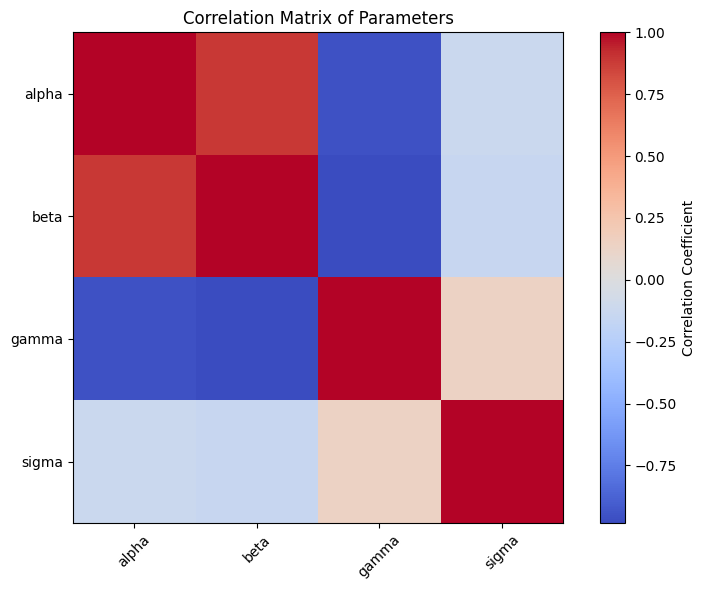

In [ ]:

print(f"Shape of samples: {samples.shape}")


correlation_matrix = np.corrcoef(samples.T)
print("Correlation matrix:")
print(correlation_matrix)


plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.title("Correlation Matrix of Parameters")
plt.xticks(range(len(initial_params)), ['alpha', 'beta', 'gamma', 'sigma'], rotation=45)
plt.yticks(range(len(initial_params)), ['alpha', 'beta', 'gamma', 'sigma'])
plt.tight_layout()
plt.show()


In [ ]:
alpha_est = np.mean(samples[:, 0])
beta_est = np.mean(samples[:, 1])
gamma_est = np.mean(samples[:, 2])
sigma_est = np.mean(samples[:, 3])

print(f"Настоящее значение alpha: {true_alpha}, Оцененное значение alpha: {alpha_est:.3f}")
print(f"Настоящее значение beta: {true_beta}, Оцененное значение beta: {beta_est:.3f}")
print(f"Настоящее значение gamma: {true_gamma}, Оцененное значение gamma: {gamma_est:.3f}")
print(f"Настоящее значение sigma: {true_sigma}, Оцененное значение sigma: {sigma_est:.3f}")

Настоящее значение alpha: 3.0, Оцененное значение alpha: 2.843
Настоящее значение beta: 0.01, Оцененное значение beta: 0.009
Настоящее значение gamma: 0.2, Оцененное значение gamma: 0.214
Настоящее значение sigma: 0.7, Оцененное значение sigma: 0.647


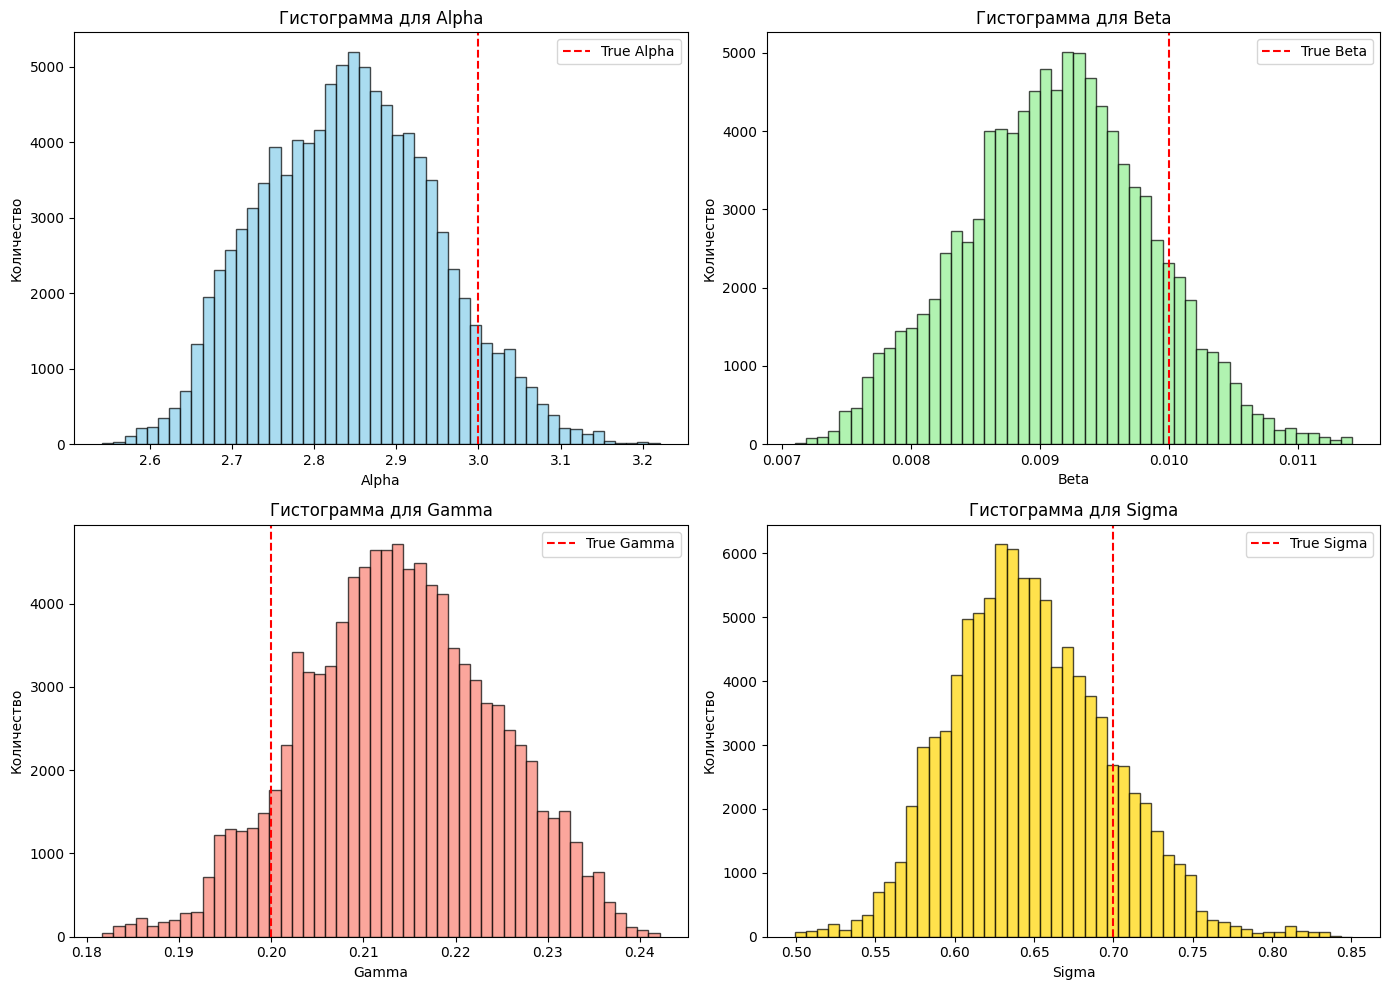

In [ ]:
plt.figure(figsize=(14, 10))


plt.subplot(2, 2, 1)
plt.hist(samples[:, 0], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(true_alpha, color="red", linestyle="--", linewidth=1.5, label="True Alpha")
plt.title("Гистограмма для Alpha")
plt.xlabel("Alpha")
plt.ylabel("Количество")
plt.legend()


plt.subplot(2, 2, 2)
plt.hist(samples[:, 1], bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
plt.axvline(true_beta, color="red", linestyle="--", linewidth=1.5, label="True Beta")
plt.title("Гистограмма для Beta")
plt.xlabel("Beta")
plt.ylabel("Количество")
plt.legend()


plt.subplot(2, 2, 3)
plt.hist(samples[:, 2], bins=50, color='salmon', edgecolor='black', alpha=0.7)
plt.axvline(true_gamma, color="red", linestyle="--", linewidth=1.5, label="True Gamma")
plt.title("Гистограмма для Gamma")
plt.xlabel("Gamma")
plt.ylabel("Количество")
plt.legend()


plt.subplot(2, 2, 4)
plt.hist(samples[:, 3], bins=50, color='gold', edgecolor='black', alpha=0.7)
plt.axvline(true_sigma, color="red", linestyle="--", linewidth=1.5, label="True Sigma")
plt.title("Гистограмма для Sigma")
plt.xlabel("Sigma")
plt.ylabel("Количество")
plt.legend()

plt.tight_layout()
plt.show()

## ОБУЧЕНИЕ

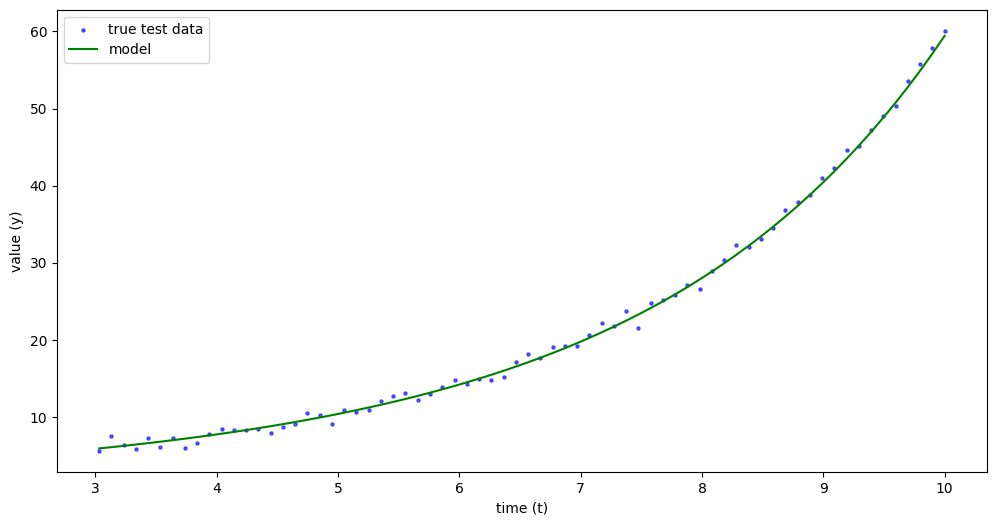

Сумма квадратов ошибок (SSE) на тестовой выборке: 31.47


In [ ]:

train_size = int(0.3 * len(t))
t_train, t_test = t[:train_size], t[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

def model(t, alpha, beta, gamma):
    return alpha * np.exp(beta * t**2 + gamma * t)


alpha_est = 2.843
beta_est = 0.009
gamma_est = 0.214

# Прогноз на тестовой выборке
y_pred = model(t_test, alpha_est, beta_est, gamma_est)

squared_errors = (y_test - y_pred) ** 2
sum_of_squared_errors = np.sum(squared_errors)

plt.figure(figsize=(12, 6))
plt.scatter(t_test, y_test, s=5, color="blue", alpha=0.6, label="true test data")
plt.plot(t_test, y_pred, color="green", label="model")
plt.xlabel("time (t)")
plt.ylabel("value (y)")
plt.legend()
plt.show()

print(f"Сумма квадратов ошибок (SSE) на тестовой выборке: {sum_of_squared_errors:.2f}")

##Часть 2
##Непараметрические методы



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.kernel_regression import KernelReg
from sklearn.linear_model import LinearRegression

In [ ]:
data = pd.read_csv("/content/dataset.csv")

In [ ]:
data.head()

,timestamp,Apple,Amazon,Salesforce,CVS,Facebook,Google,IBM,Coca-Cola,Pfizer,UPS
0,2015-02-26 21:42:53,104,57.0,11,0.0,53.0,35.0,7.0,8.0,3.0,2.0
1,2015-02-26 21:47:53,100,43.0,10,0.0,64.0,41.0,4.0,8.0,2.0,2.0
2,2015-02-26 21:52:53,99,55.0,3,0.0,49.0,32.0,14.0,5.0,2.0,4.0
3,2015-02-26 21:57:53,154,64.0,4,0.0,48.0,36.0,6.0,13.0,36.0,3.0
4,2015-02-26 22:02:53,120,93.0,9,0.0,22.0,32.0,1.0,22.0,8.0,5.0


In [ ]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)
day_data = data.resample('D').sum()
apple = day_data[['Apple']].copy()
amazon = day_data[['Amazon']].copy()
apple.reset_index(drop=True, inplace=True)
amazon.reset_index(drop=True, inplace=True)
amazon.head()

,Amazon
0,1718.0
1,16184.0
2,15812.0
3,13574.0
4,15017.0


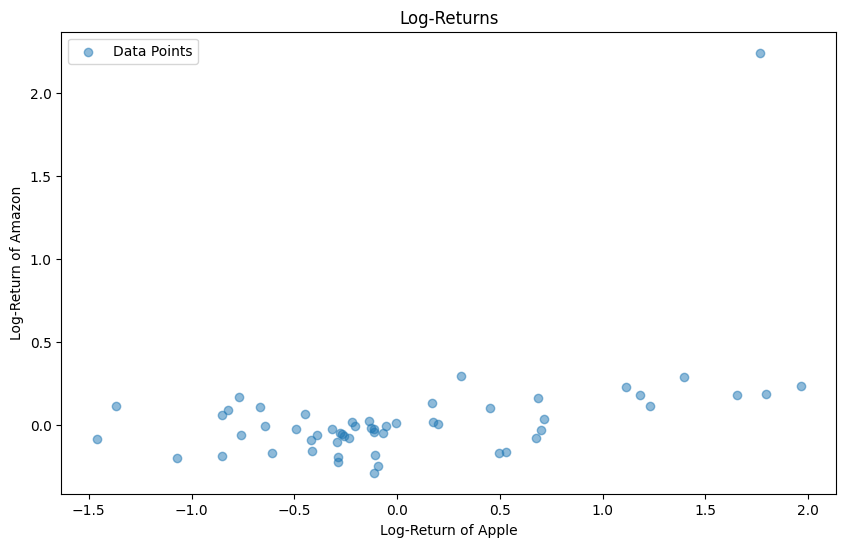

In [ ]:
apple['Apple'] = apple['Apple'].replace(0, np.nan)
amazon['Amazon'] = amazon['Amazon'].replace(0, np.nan)

# Лог-приросты
log_returns_apple = np.diff(np.log(apple['Apple']))
log_returns_amazon = np.diff(np.log(amazon['Amazon']))

plt.figure(figsize=(10, 6))
plt.scatter(log_returns_apple, log_returns_amazon, alpha=0.5, label='Data Points')
plt.title('Log-Returns')
plt.xlabel('Log-Return of Apple')
plt.ylabel('Log-Return of Amazon')
plt.legend()
plt.show()

In [ ]:
# Сортировка данных
sort_indices = np.argsort(log_returns_apple)
log_returns_apple_sorted = log_returns_apple[sort_indices]
log_returns_amazon_sorted = log_returns_amazon[sort_indices]

#Удаляем NAN
mask = ~np.isnan(log_returns_apple_sorted) & ~np.isnan(log_returns_amazon_sorted)
log_returns_apple_sorted = log_returns_apple_sorted[mask]
log_returns_amazon_sorted = log_returns_amazon_sorted[mask]

In [ ]:
# Определение оптимальной ширины окна по правилу Сильвермана
def silverman_rule(data):
    std_dev = np.std(data, ddof=1)
    n = len(data)
    return (4 * (std_dev ** 5) / (3 * n)) ** (1 / 5)

bandwidth_rule = silverman_rule(log_returns_apple_sorted)
print(f'Окно по правилу Сильвермана: {bandwidth_rule}')

Окно по правилу Сильвермана: 0.373183736312548


In [ ]:
# Непараметрическая регрессия
kr = KernelReg(endog=log_returns_amazon_sorted, exog=log_returns_apple_sorted, var_type='c', bw=[bandwidth_rule])
y_pred_np, _ = kr.fit(log_returns_apple_sorted)

# Линейная регрессия
lm = LinearRegression()
lm.fit(log_returns_apple_sorted.reshape(-1, 1), log_returns_amazon_sorted)
y_pred_linear = lm.predict(log_returns_apple_sorted.reshape(-1, 1))


# Сравнение качества интерполяции
ssr_nonparam = np.sum((log_returns_amazon_sorted - y_pred_np) ** 2)
ssr_linear = np.sum((log_returns_amazon_sorted - y_pred_linear) ** 2)

print(f'SSR Nonparametric: {ssr_nonparam}')
print(f'SSR Linear: {ssr_linear}')

SSR Nonparametric: 3.7861710132151907
SSR Linear: 4.649105669680568


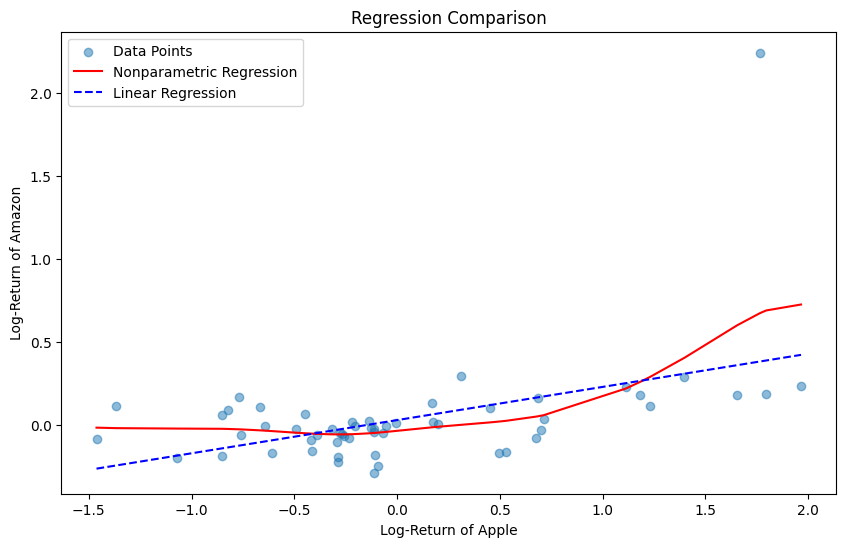

In [ ]:
# График регрессионных кривых
plt.figure(figsize=(10, 6))
plt.scatter(log_returns_apple, log_returns_amazon, alpha=0.5, label='Data Points')
plt.plot(log_returns_apple_sorted, y_pred_np, color='red', linestyle='-', label='Nonparametric Regression')
plt.plot(log_returns_apple_sorted, y_pred_linear, color='blue', linestyle='--', label='Linear Regression')
plt.title('Regression Comparison')
plt.xlabel('Log-Return of Apple')
plt.ylabel('Log-Return of Amazon')
plt.legend()
plt.show()

SSR для непараметрической регрессии на тестовых данных: 4.671172234751574
SSR для линейной регрессии на тестовых данных: 4.971141621461598


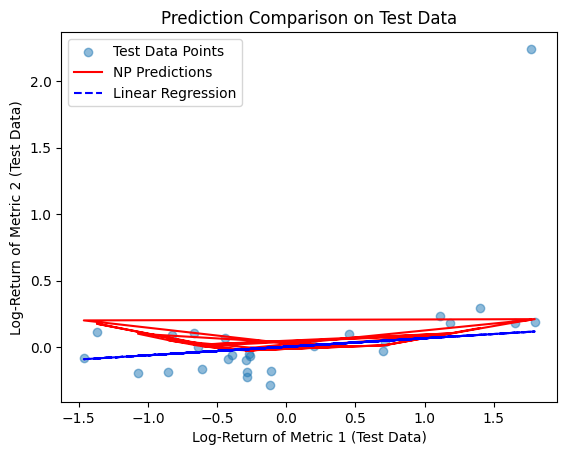

In [ ]:
from sklearn.model_selection import train_test_split

log_returns_apple_train, log_returns_apple_test, log_returns_amazon_train, log_returns_amazon_test = train_test_split(
    log_returns_apple, log_returns_amazon, test_size=0.5, random_state=42
)


# Удаляем NaN из данных
mask_train = ~np.isnan(log_returns_apple_train) & ~np.isnan(log_returns_amazon_train)
mask_test = ~np.isnan(log_returns_apple_test) & ~np.isnan(log_returns_amazon_test)

log_returns_apple_train = log_returns_apple_train[mask_train]
log_returns_amazon_train = log_returns_amazon_train[mask_train]
log_returns_apple_test = log_returns_apple_test[mask_test]
log_returns_amazon_test = log_returns_amazon_test[mask_test]


# Сортировка данных
sort_indices_train = np.argsort(log_returns_apple_train)
log_returns_apple_train_sorted = log_returns_apple_train[sort_indices_train]
log_returns_amazon_train_sorted = log_returns_amazon_train[sort_indices_train]

#Непараметрическая и линейные регрессии
kr_train = KernelReg(endog=log_returns_amazon_train_sorted, exog=log_returns_apple_train_sorted, var_type='c', bw=[bandwidth_rule])
y_pred_np_train, _ = kr_train.fit(log_returns_apple_train_sorted)

lm_train = LinearRegression()
lm_train.fit(log_returns_apple_train_sorted.reshape(-1, 1), log_returns_amazon_train_sorted)
y_pred_linear_train = lm_train.predict(log_returns_apple_train_sorted.reshape(-1, 1))

# Прогноз на тестовом наборе
y_pred_np_test, _ = kr_train.fit(log_returns_apple_test)
y_pred_linear_test = lm_train.predict(log_returns_apple_test.reshape(-1, 1))

# SSR на тестовом наборе
ssr_nonparam_test = np.sum((log_returns_amazon_test - y_pred_np_test) ** 2)
ssr_linear_test = np.sum((log_returns_amazon_test - y_pred_linear_test) ** 2)

print(f'SSR для непараметрической регрессии на тестовых данных: {ssr_nonparam_test}')
print(f'SSR для линейной регрессии на тестовых данных: {ssr_linear_test}')

plt.scatter(log_returns_apple_test, log_returns_amazon_test, alpha=0.5, label='Test Data Points')
plt.plot(log_returns_apple_test, y_pred_np_test, color='red', linestyle='-', label='NP Predictions')
plt.plot(log_returns_apple_test, y_pred_linear_test, color='blue', linestyle='--', label='Linear Regression')
plt.title('Prediction Comparison on Test Data')
plt.xlabel('Log-Return of Metric 1 (Test Data)')
plt.ylabel('Log-Return of Metric 2 (Test Data)')
plt.legend()
plt.show()


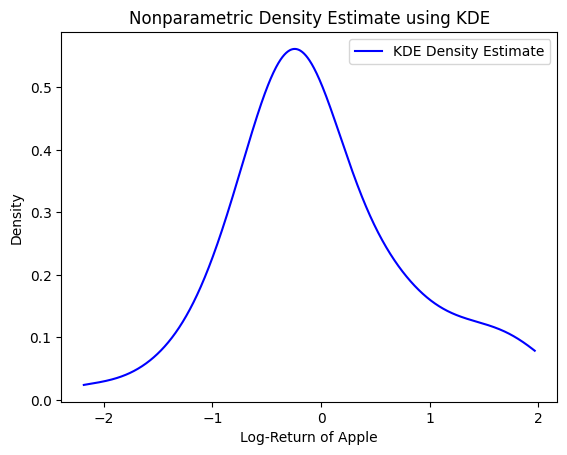

In [ ]:
from sklearn.neighbors import KernelDensity


log_returns_apple_reshape = log_returns_apple.reshape(-1, 1)

# Оценка плотности методом ядерного сглаживания
kde = KernelDensity(kernel="gaussian", bandwidth=bandwidth_rule)
kde.fit(log_returns_apple_reshape)

x_d = np.linspace(min(log_returns_apple), max(log_returns_apple), 1000).reshape(-1, 1)

# Вычисление оценки плотности
log_density = kde.score_samples(x_d)
density = np.exp(log_density)

plt.plot(x_d, density, color="blue", label="KDE Density Estimate")
plt.title("Nonparametric Density Estimate using KDE")
plt.xlabel("Log-Return of Apple")
plt.ylabel("Density")
plt.legend()
plt.show()


##Часть 3
##Разделение смесей

### 2. **Функция правдоподобия (likelihood)**

Функция правдоподобия для смеси из двух нормальных распределений (с параметрами $\mu_1$, $\sigma_1$, $\mu_2\$, $\sigma_2$, и весами $w_1\$ для набора данных $x_1, x_2, \dots, x_n$ будет выглядеть следующим образом:

$L(\mu_1, \sigma_1, \mu_2, \sigma_2, w_1) = \prod_{i=1}^{n} \left( w_1 \cdot N(x_i | \mu_1, \sigma_1^2) + w_2 \cdot N(x_i | \mu_2, \sigma_2^2) \right)$

Логарифм функции правдоподобия:

$\log L(\mu_1, \sigma_1, \mu_2, \sigma_2, w_1) = \sum_{i=1}^{n} \log \left( w_1 \cdot N(x_i | \mu_1, \sigma_1^2) + w_2 \cdot N(x_i | \mu_2, \sigma_2^2) \right)$

### 3. **Априорная функция (prior)**

Априорная функция для параметров смеси может быть следующей:

- Для $\mu_1$ и $\mu_2$ используем нормальное распределение:
  
$\mu_1 \sim \mathcal{N}(0, 10^2), \quad \mu_2 \sim \mathcal{N}(0, 10^2)$
  
- Для $\sigma_1$ и $\sigma_2$ используем нормальное распределение с маленьким стандартным отклонением ($5$):
  $\sigma_1 \sim \mathcal{N}(0, 5^2), \quad \sigma_2 \sim \mathcal{N}(0, 5^2)$

- Для веса смеси $w_1$ используем равномерное распределение на интервале от 0 до 1:
  $w_1 \sim \mathcal{U}(0, 1)$

Таким образом, априорная функция будет равна:

$\log p(\mu_1, \sigma_1, \mu_2, \sigma_2, w_1) = \log \mathcal{N}(\mu_1 | 0, 10^2) + \log \mathcal{N}(\mu_2 | 0, 10^2) + \log \mathcal{N}(\sigma_1 | 0, 5^2) + \log \mathcal{N}(\sigma_2 | 0, 5^2) + \log \mathcal{U}(w_1 | 0, 1)$

### 4. **Апостериорная функция (posterior)**

Апостериорная функция пропорциональна произведению функции правдоподобия и априорной функции:

$p(\mu_1, \sigma_1, \mu_2, \sigma_2, w_1 | \{x_i\}) \propto L(\mu_1, \sigma_1, \mu_2, \sigma_2, w_1) \cdot p(\mu_1, \sigma_1, \mu_2, \sigma_2, w_1)$

Или в логарифмическом виде:

$\log p(\mu_1, \sigma_1, \mu_2, \sigma_2, w_1 | \{x_i\}) = \log L(\mu_1, \sigma_1, \mu_2, \sigma_2, w_1) + \log p(\mu_1, \sigma_1, \mu_2, \sigma_2, w_1)$

Normality test for component 1 (data1):
Shapiro-Wilk Test: statistic=0.9986092190571166, p-value=0.6272578290249117
Normality test for component 2 (data2):
Shapiro-Wilk Test: statistic=0.9987638229737376, p-value=0.7311929770364404


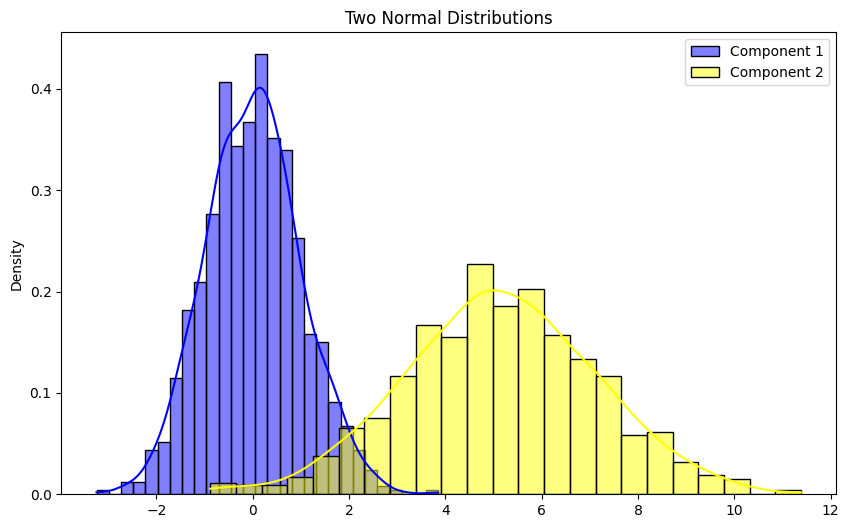

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

np.random.seed(42)

mu1, sigma1 = 0, 1
mu2, sigma2 = 5, 2

n = 1000
data1 = np.random.normal(mu1, sigma1, n)
data2 = np.random.normal(mu2, sigma2, n)

mix_data = np.concatenate([data1, data2])

# Проверка нормальности с помощью теста Шапиро
def test_normality(data):
    stat, p_value = shapiro(data)
    print(f"Shapiro-Wilk Test: statistic={stat}, p-value={p_value}")
    return p_value > 0.05

print("Normality test for component 1 (data1):")
test_normality(data1)
print("Normality test for component 2 (data2):")
test_normality(data2)

# Визуализация данных
plt.figure(figsize=(10, 6))
sns.histplot(data1, kde=True, label='Component 1', color='blue', stat='density')
sns.histplot(data2, kde=True, label='Component 2', color='yellow', stat='density')
plt.legend()
plt.title("Two Normal Distributions")
plt.show()

Результаты теста Шапиро-Уилка для обеих компонент показывают p-value больше 0.05, что означает, что гипотеза о нормальности данных не отвергается на стандартном уровне значимости 5% (p-value > 0.05). Это говорит о том, что обе компоненты смеси можно считать нормально распределёнными, так как результаты теста не дают основания отвергать гипотезу о нормальности для каждой из компонент


In [ ]:
def log_likelihood(params, data):
    mu1, sigma1, mu2, sigma2, w1 = params
    w2 = 1 - w1
    p1 = w1 * norm.pdf(data, mu1, sigma1)
    p2 = w2 * norm.pdf(data, mu2, sigma2)

    log_likelihood = np.sum(np.log(p1 + p2))
    return log_likelihood

In [ ]:

def log_prior(params):
    mu1, sigma1, mu2, sigma2, w1 = params
    prior_mu = 0
    prior_sigma = 5  #

    prior_mu1 = norm.logpdf(mu1, loc=prior_mu, scale=prior_sigma)
    prior_sigma1 = norm.logpdf(sigma1, loc=0, scale=5)  # для sigma
    prior_mu2 = norm.logpdf(mu2, loc=prior_mu, scale=prior_sigma)
    prior_sigma2 = norm.logpdf(sigma2, loc=0, scale=5)
    prior_w1 = uniform.logpdf(w1, loc=0, scale=1)  # для веса w1

    return prior_mu1 + prior_sigma1 + prior_mu2 + prior_sigma2 + prior_w1

def log_posterior(params, data):
    return log_likelihood(params, data) + log_prior(params)

Means of the components: [[0.04820727]
 [5.25258102]]
Covariances of the components: [[[0.99437724]]

 [[3.59527054]]]
Weights of the components: [0.51342945 0.48657055]


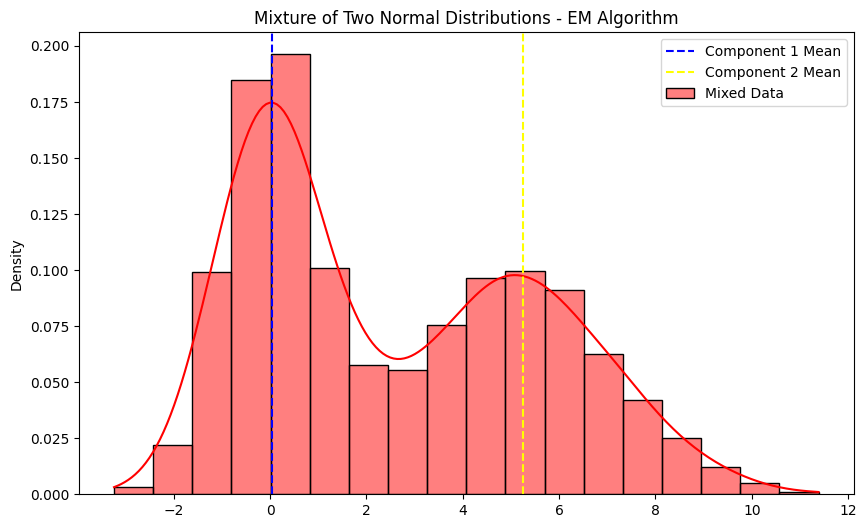

In [ ]:

from sklearn.mixture import GaussianMixture

# EM-алгоритм для разделения смеси
gmm = GaussianMixture(n_components=2)
gmm.fit(mix_data.reshape(-1, 1))

# Параметры модели
print("Means of the components:", gmm.means_)
print("Covariances of the components:", gmm.covariances_)
print("Weights of the components:", gmm.weights_)


labels = gmm.predict(mix_data.reshape(-1, 1))

# Визуализация
plt.figure(figsize=(10, 6))
sns.histplot(mix_data, kde=True, label='Mixed Data', color='red', stat='density')
plt.axvline(gmm.means_[0], color='blue', linestyle='--', label='Component 1 Mean')
plt.axvline(gmm.means_[1], color='yellow', linestyle='--', label='Component 2 Mean')
plt.legend()
plt.title("Mixture of Two Normal Distributions - EM Algorithm")
plt.show()

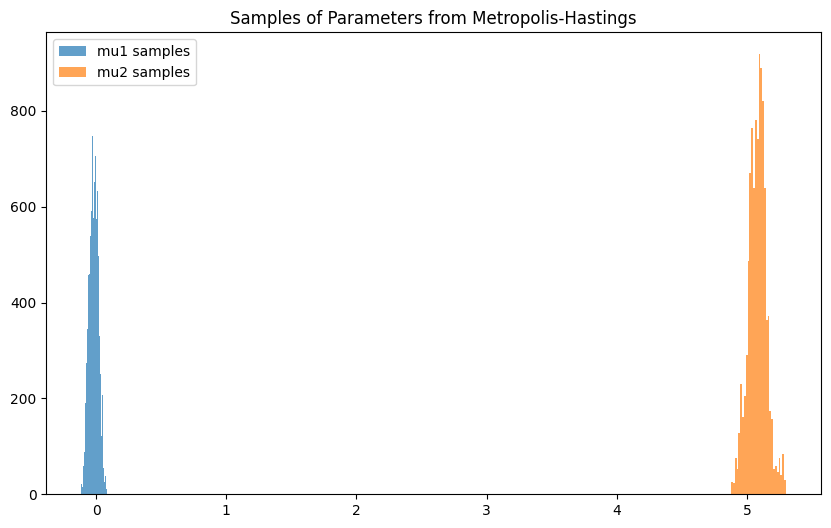

Acceptance Rate: 0.2549


In [ ]:
from scipy.stats import norm
from scipy.stats import norm, uniform

def metropolis_hastings(log_posterior, initial_params, step_sizes, n_samples, burn_in):
    samples = []
    current_params = initial_params
    current_log_posterior = log_posterior(current_params, mix_data)
    accept_count = 0

    for _ in range(n_samples + burn_in):
        proposed_params = current_params + np.random.normal(0, step_sizes, size=len(initial_params))
        proposed_log_posterior = log_posterior(proposed_params, mix_data)

        acceptance_prob = np.exp(proposed_log_posterior - current_log_posterior)
        if np.random.rand() < acceptance_prob:
            current_params = proposed_params
            current_log_posterior = proposed_log_posterior
            if _ >= burn_in:
                accept_count += 1

        if _ >= burn_in:
            samples.append(current_params)

    acceptance_rate = accept_count / n_samples
    return np.array(samples), acceptance_rate

initial_params = np.array([0, 1, 5, 2, 0.5])
step_sizes = np.array([0.01, 0.01, 0.01, 0.01, 0.05])
n_samples = 10000
burn_in = 200

samples, acceptance_rate = metropolis_hastings(log_posterior, initial_params, step_sizes, n_samples, burn_in)

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.hist(samples[:, 0], bins=30, alpha=0.7, label="mu1 samples")
plt.hist(samples[:, 2], bins=30, alpha=0.7, label="mu2 samples")
plt.legend()
plt.title("Samples of Parameters from Metropolis-Hastings")
plt.show()

print(f"Acceptance Rate: {acceptance_rate}")

##ДЗ 2 часть задание 1

In [ ]:
from scipy.stats import mannwhitneyu


In [ ]:
from scipy.stats import mannwhitneyu

first = pd.read_csv("/content/COVID-19_Cases__Tests__and_Deaths_by_ZIP_Code_-_Historical.csv")
second = pd.read_csv("/content/weatherHistory.csv")




In [ ]:
first.head()

,ZIP Code,Week Number,Week Start,Week End,Cases - Weekly,Cases - Cumulative,Case Rate - Weekly,Case Rate - Cumulative,Tests - Weekly,Tests - Cumulative,...,Test Rate - Cumulative,Percent Tested Positive - Weekly,Percent Tested Positive - Cumulative,Deaths - Weekly,Deaths - Cumulative,Death Rate - Weekly,Death Rate - Cumulative,Population,Row ID,ZIP Code Location
0,60622,31,07/26/2020,08/01/2020,28.0,877.0,53.0,1661.2,1329.0,13148,...,24904.8,0.0,0.1,0,56,0.0,106.1,52793,60622-2020-31,POINT (-87.681818 41.902762)
1,60622,32,08/02/2020,08/08/2020,34.0,911.0,64.0,1725.6,1405.0,14553,...,27566.2,0.0,0.1,0,56,0.0,106.1,52793,60622-2020-32,POINT (-87.681818 41.902762)
2,60622,33,08/09/2020,08/15/2020,41.0,952.0,78.0,1803.3,1542.0,16095,...,30487.0,0.0,0.1,0,56,0.0,106.1,52793,60622-2020-33,POINT (-87.681818 41.902762)
3,60622,34,08/16/2020,08/22/2020,42.0,994.0,80.0,1882.8,1674.0,17769,...,33657.9,0.0,0.1,0,56,0.0,106.1,52793,60622-2020-34,POINT (-87.681818 41.902762)
4,60622,35,08/23/2020,08/29/2020,45.0,1039.0,85.0,1968.1,1540.0,19309,...,36574.9,0.0,0.1,0,56,0.0,106.1,52793,60622-2020-35,POINT (-87.681818 41.902762)


In [ ]:
cases = first['Cases - Weekly'].values[:100]
cases

array([ 28.,  34.,  41.,  42.,  45.,  29.,  46.,  63.,  45., 166., 196.,
       341., 310., 230., 174., 231., 201., 144., 127., 191., 200.,  80.,
       116.,  20.,  14.,   4.,  12.,  28.,  81.,  59.,  54.,  37.,  23.,
        17.,   7.,   3.,  11.,   0.,  13.,  15.,  53.,  50.,  55.,  84.,
        18.,  19.,  33.,  49.,  70.,  86.,  85., 114., 159., 164., 284.,
       160., 170., 108.,   8.,  29.,  44.,  54.,  48.,  56.,  14.,  10.,
         5.,  23.,  12.,  25.,  12.,  17.,  15.,  13.,  69.,   5.,   0.,
        21.,  20.,  12.,   0.,   5.,   1.,   5.,  49.,  67.,  46.,  48.,
        82., 108., 112.,  98., 143., 884., 838.,  46.,  37.,  53.,  46.,
       759.])

In [ ]:
second.tail()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.
96452,2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39.0,15.5204,0.0,1016.16,Partly cloudy starting in the morning.


In [ ]:
temperature = second["Temperature (C)"].tail(100)
temperature


,Temperature (C)
96353,16.111111
96354,15.950000
96355,15.366667
96356,15.366667
96357,14.327778
...,...
96448,26.016667
96449,24.583333
96450,22.038889
96451,21.522222


In [ ]:
stat, p_value = mannwhitneyu(cases, temperature, alternative='two-sided')

print(f"Статистика: {stat}, p-значение: {p_value}")
if p_value > 0.05:
    print("Функции распределения равны (нет значимых различий)")
else:
    print("Функции распределения не равны")

Статистика: 7137.0, p-значение: 1.785293476614203e-07
Функции распределения не равны


#Задача 11
##Найти численно с помощью алгоритма М-Х энтропию смеси двух нормальных распределений.

In [ ]:

w1, w2 = 0.5, 0.5
mu1, mu2 = 0, 3
sigma1, sigma2 = 1, 1


def mixture_density(x):
    norm1 = (1 / (np.sqrt(2 * np.pi) * sigma1)) * np.exp(-0.5 * ((x - mu1) / sigma1)**2)
    norm2 = (1 / (np.sqrt(2 * np.pi) * sigma2)) * np.exp(-0.5 * ((x - mu2) / sigma2)**2)
    return w1 * norm1 + w2 * norm2


def metropolis_hastings(num_samples, proposal_std=1.0):
    samples = []
    x_current = 0
    for _ in range(num_samples):
        x_proposed = np.random.normal(x_current, proposal_std)
        acceptance_ratio = min(1, mixture_density(x_proposed) / mixture_density(x_current))
        if np.random.rand() < acceptance_ratio:
            x_current = x_proposed
        samples.append(x_current)
    return np.array(samples)


def estimate_entropy(samples):
    log_probs = np.log(mixture_density(samples))
    return -np.mean(log_probs)

num_samples = 100000
samples = metropolis_hastings(num_samples)
entropy = estimate_entropy(samples)

print(f"Оценка энтропии смеси: {entropy:.4f}")


Оценка энтропии смеси: 1.9476


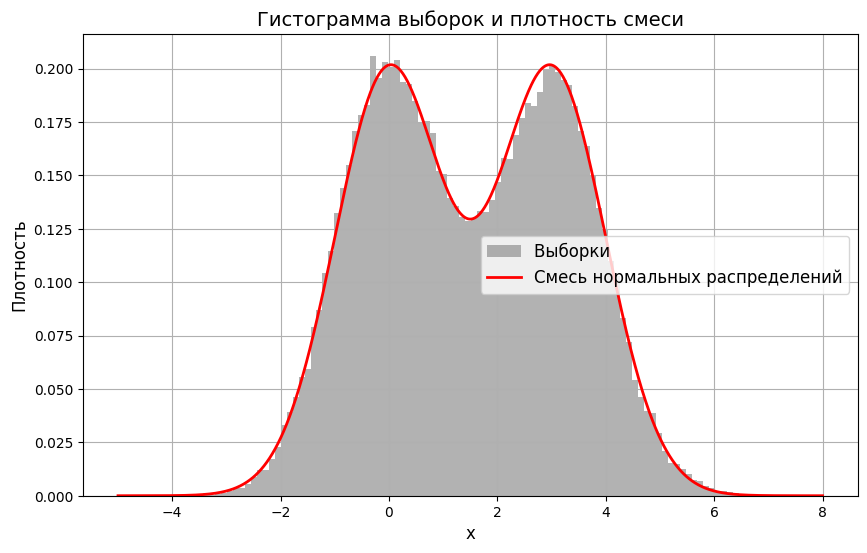

In [ ]:

x = np.linspace(-5, 8, 1000)
y = mixture_density(x)

plt.figure(figsize=(10, 6))
plt.hist(samples, bins=100, density=True, alpha=0.6, color="gray", label="Выборки ")
plt.plot(x, y, label="Смесь нормальных распределений", color="red", linewidth=2)
plt.title("Гистограмма выборок и плотность смеси", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("Плотность", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()
